## Import Required functions

In [1]:
import matplotlib.pyplot as ppt
import numpy as np
from scipy import stats

from girth.synthetic import create_synthetic_irt_dichotomous
from girth import twopl_mml

In [2]:
rng = np.random.default_rng(43523475823908523410982367784503498672)

### Use a Bimodal distribution for theta

In [3]:
# Defines the locations
x_pdf = np.linspace(-6, 6, 10001)

### Bimodal Distribution
loc1_bim = -0.705
loc2_bim = 1.058
scale1_bim = np.sqrt(0.254)
scale2_bim = np.sqrt(0.254)
weight1 = 0.6
weight2 = 1 - weight1

n = (weight1 * stats.norm(loc=loc1_bim, scale=scale1_bim).pdf(x_pdf) + 
     weight2 * stats.norm(loc=loc2_bim, scale=scale2_bim).pdf(x_pdf))
distribution_bimodal = n / n.sum()

#### The Bimodal Distribution

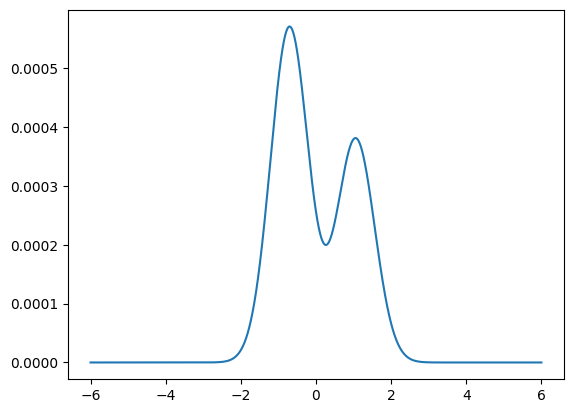

In [4]:
ppt.show(ppt.plot(x_pdf, distribution_bimodal))

### Create some synthetic data

In [5]:
# People Parameters
n_items = 20
n_people = 1000

# Item Parameters
discrimination = .25 + rng.rayleigh(0.7, size=(n_items,))
difficulty = np.linspace(-1.5, 1.5, n_items)
theta = rng.choice(x_pdf, size=(n_people), p=distribution_bimodal)

# Synthetic Data
syn_data = create_synthetic_irt_dichotomous(difficulty, discrimination, theta, seed=rng)

#### Make sure we have sampled from a bimodal distribution

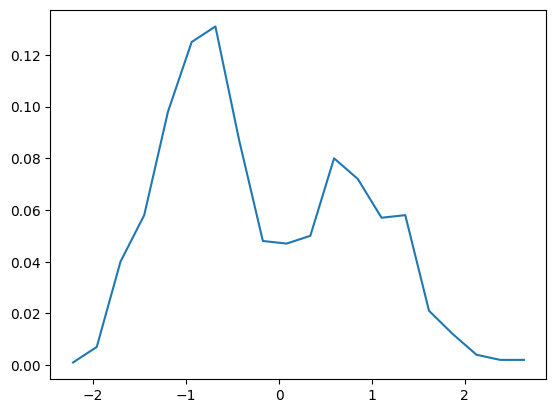

In [6]:
hx, xx = np.histogram(theta, 20)
ppt.show(ppt.plot(xx[:-1], hx/hx.sum()))

#### Run the estimation with and without latent estimation

In [7]:
results_with_estimation = twopl_mml(syn_data, {'estimate_distribution': True, 'number_of_samples': 9})
results_no_estimation = twopl_mml(syn_data, {'estimate_distribution': False})

#### Run some basic metrics

In [8]:
def rmse(test, actual):
    return np.sqrt(np.square(test - actual).mean())

print("Discrimination Assessment")
print(f'Assuming Normal(0, 1) distribution, rmse: {rmse(results_no_estimation["Discrimination"], discrimination).round(3)}')
print(f'Estimating distribution, rmse: {rmse(results_with_estimation["Discrimination"], discrimination).round(3)}')

print("\nDifficulty Assessment")
print(f'Assuming Normal(0, 1) distribution, rmse: {rmse(results_no_estimation["Difficulty"], difficulty).round(3)}')
print(f'Estimating distribution, rmse: {rmse(results_with_estimation["Difficulty"], difficulty).round(3)}')


Discrimination Assessment
Assuming Normal(0, 1) distribution, rmse: 0.125
Estimating distribution, rmse: 0.101

Difficulty Assessment
Assuming Normal(0, 1) distribution, rmse: 0.109
Estimating distribution, rmse: 0.104


#### Plot the continuous recovered distribution

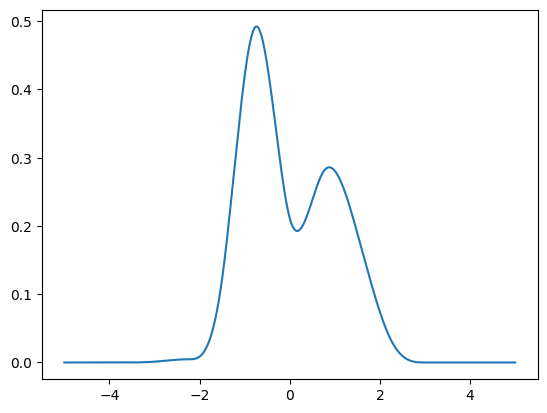

In [9]:
x, y = results_with_estimation['LatentPDF'].cubic_splines[-1].continuous_pdf()
ppt.show(ppt.plot(x, y))

#### Get the spline coefficients

In [10]:
results_with_estimation['LatentPDF'].cubic_splines[-1].coefficients[2:-2].round(3)

array([0.   , 0.005, 0.   , 0.545, 0.034, 0.27 , 0.145, 0.   , 0.   ])

#### Get the probability at a particular location

In [11]:
theta_locations = [-2, 0, 2]
results_with_estimation['LatentPDF'].cubic_splines[-1](theta_locations)

array([0.00852862, 0.21154529, 0.07406221])

In [17]:
np.exp(-1/16)

0.9394130628134758